In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import cv2
import os
import glob
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model=tf.keras.models.load_model('classify_model.h5')

In [3]:
face_model=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [20]:
import skimage.io as io
img = io.imread('./42169.jpg')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)

mask_label = {0:'Has Mask!',1:'No Mask'}
dist_label = {0:(0,255,0),1:(255,0,0)}
MIN_DISTANCE = 0

def detectMask(path):
    img = io.imread(path)
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

    faces = face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 1)

    plt.figure(figsize=(12, 12))
    plt.imshow(img)

    if len(faces) >= 1:
        label = [0 for i in range(len(faces))]
        for i in range(len(faces) - 1):
            for j in range(i + 1, len(faces)):
                dist = distance.euclidean(faces[i][:2], faces[j][:2])
                if dist < MIN_DISTANCE:
                    label[i] = 1
                    label[j] = 1

        new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Colored output image
        for i in range(len(faces)):
            (x, y, w, h) = faces[i]
            crop = new_img[y:y + h, x:x + w]
            crop = cv2.resize(crop, (150, 150))
            crop = np.reshape(crop, [1, 150, 150, 3]) / 255.0
            mask_result = model.predict(crop)
            cv2.putText(new_img, mask_label[round(mask_result[0][0])], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, dist_label[label[i]], 2)
            cv2.rectangle(new_img, (x, y), (x + w, y + h), dist_label[label[i]], 1)

        plt.figure(figsize=(10, 10))
        plt.imshow(new_img)
    else:
        print("No Face!")

1/1 [==============================] - 0s 109ms/step


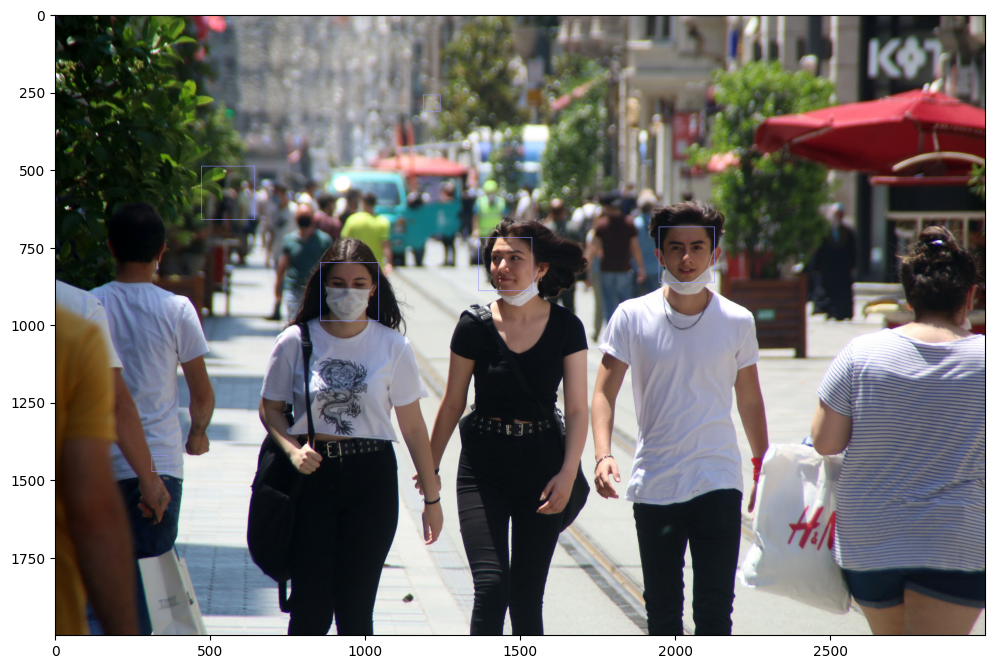

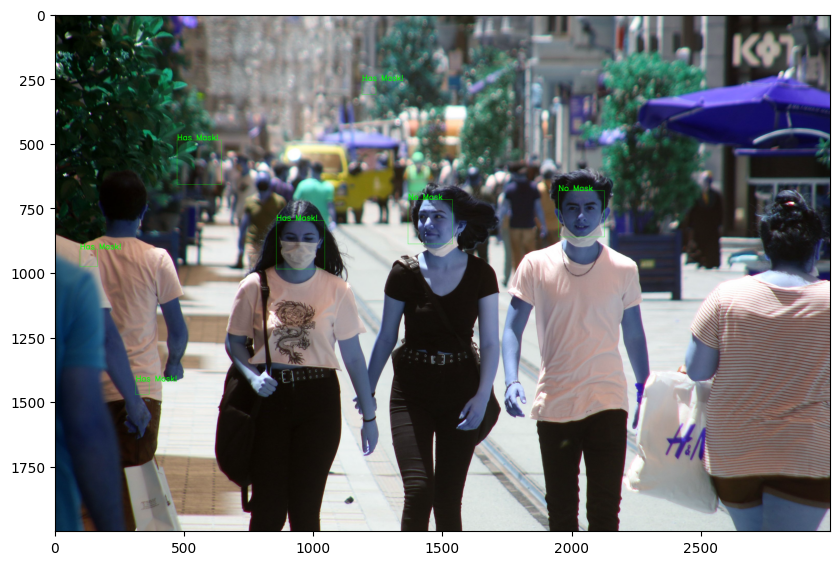

In [21]:
path = './42169.jpg'
detectMask(path)

1/1 [==============================] - 0s 99ms/step


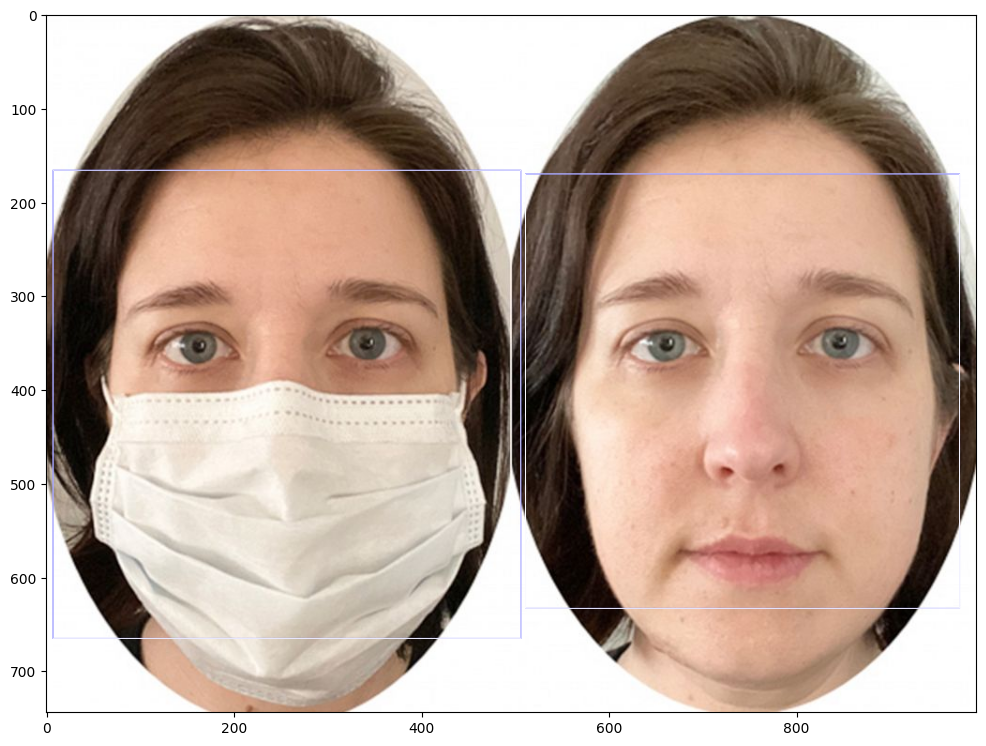

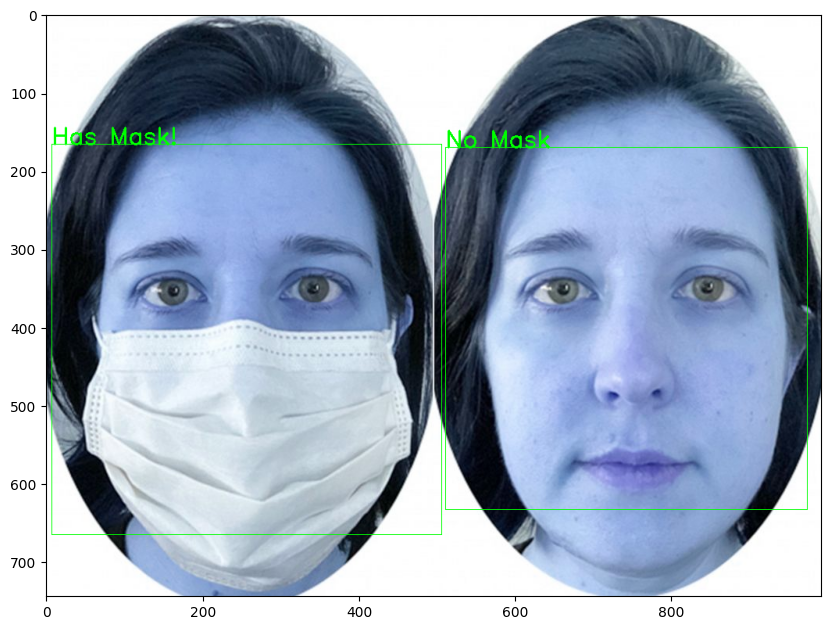

In [22]:
path="./woman-mask-split-04-ht-jt-210316_1615932165011_hpEmbed_4x3_992.jpg"
detectMask(path)

1/1 [==============================] - 0s 94ms/step


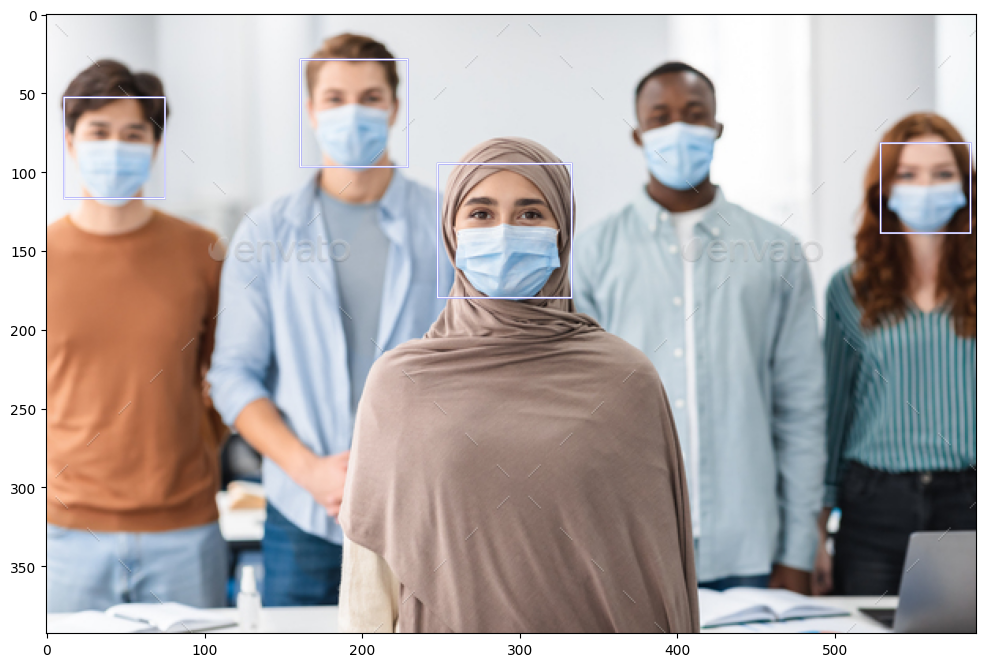

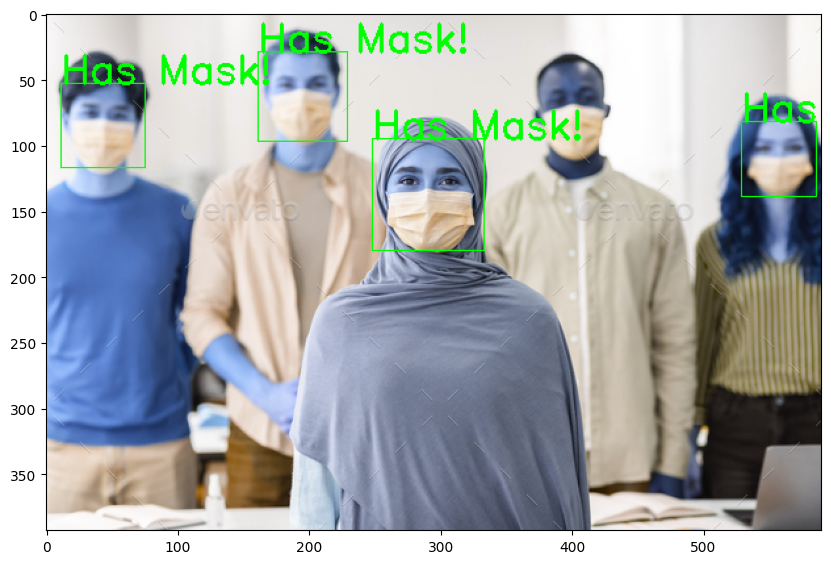

In [23]:
path="./241_1R3A6625.jpg"
detectMask(path)

1/1 [==============================] - 0s 82ms/step


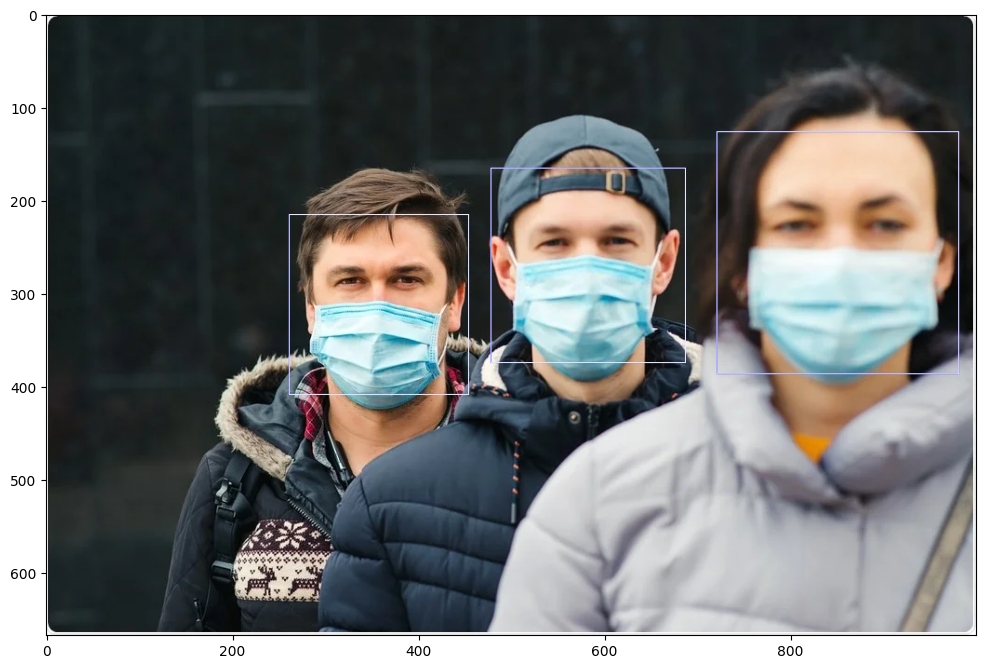

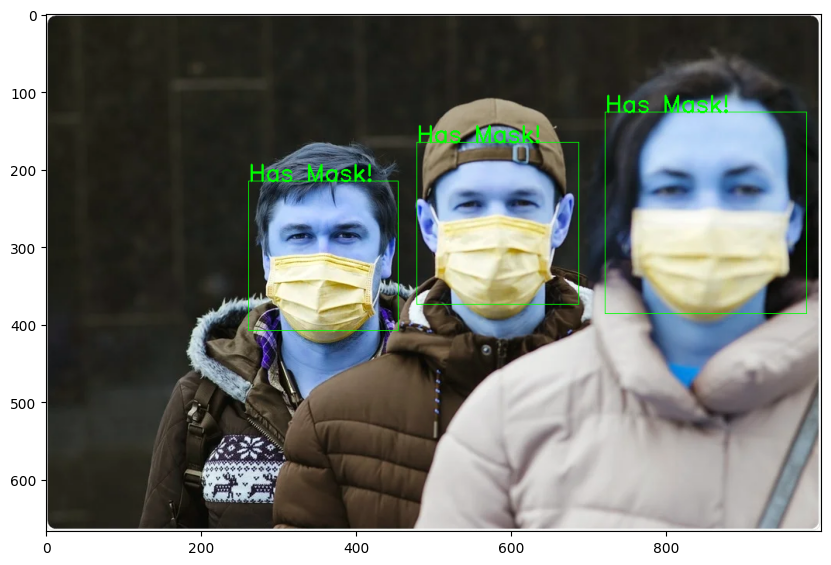

In [24]:
path="./shutterstock_1689113587.jpg"
detectMask(path)

1/1 [==============================] - 0s 77ms/step


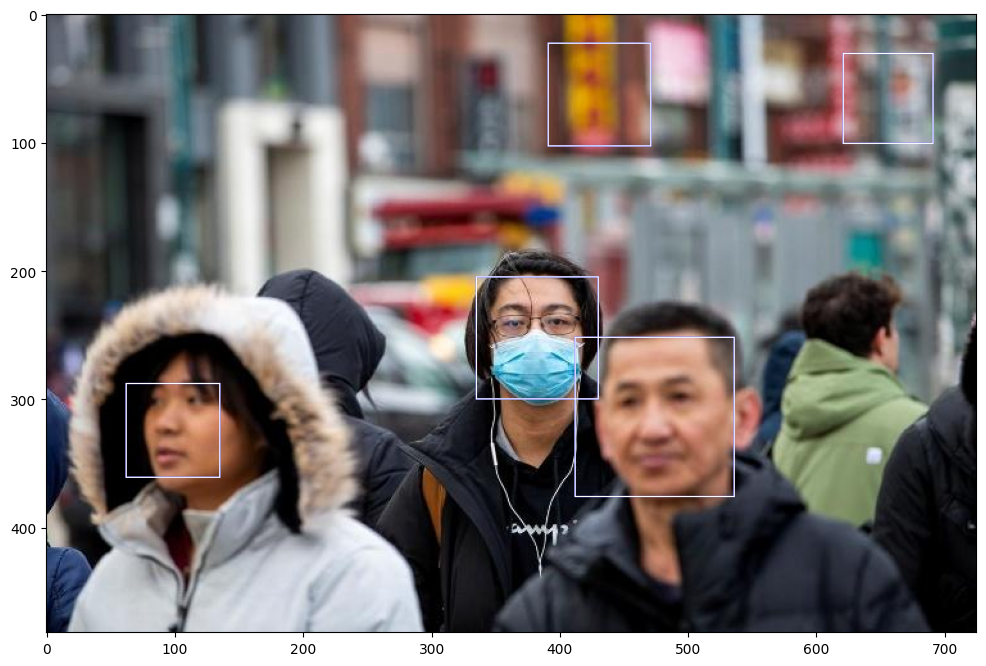

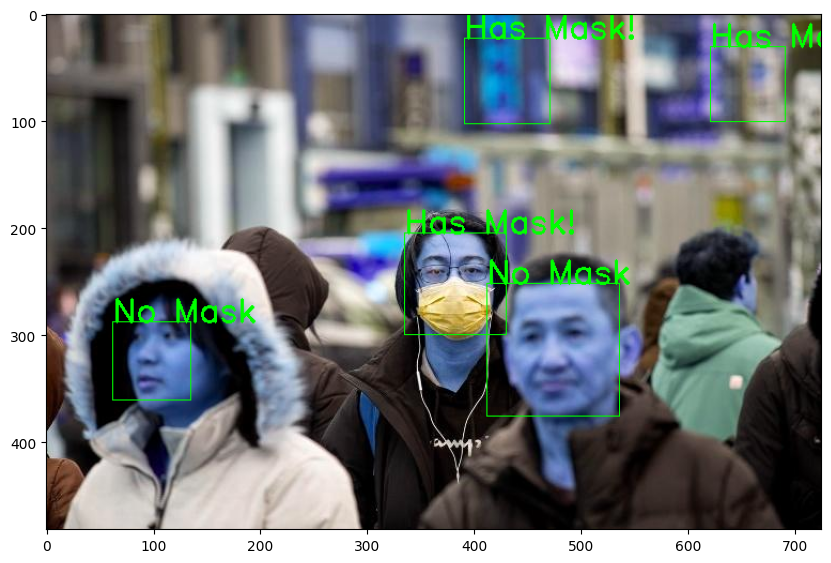

In [37]:
path="./Coronavirus-Mask-Wearing-Method-123444_5e4cf092b4cc2.jpg"
detectMask(path)

1/1 [==============================] - 0s 80ms/step


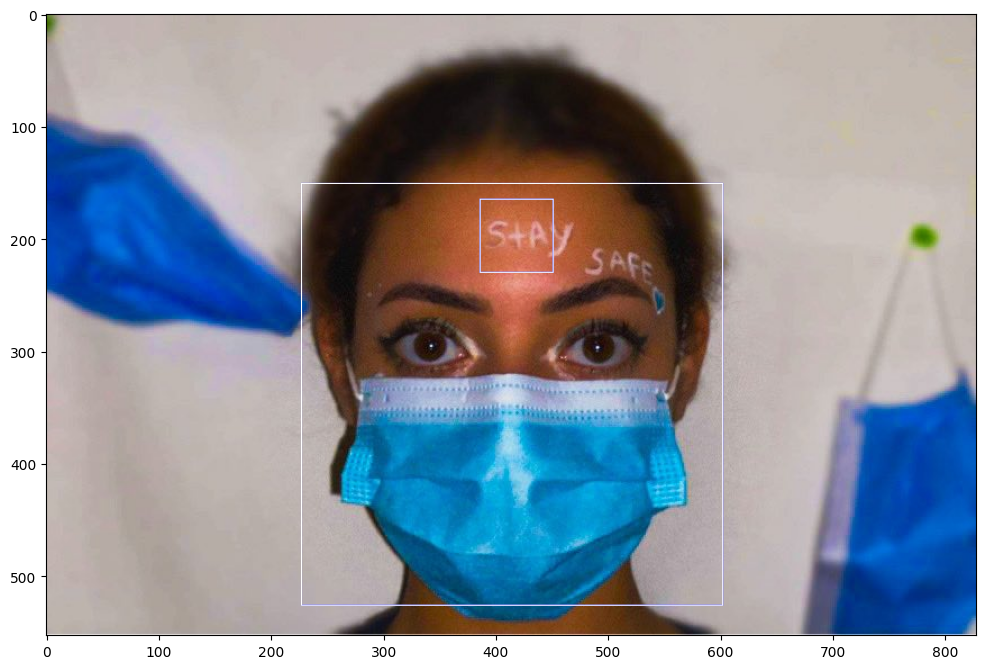

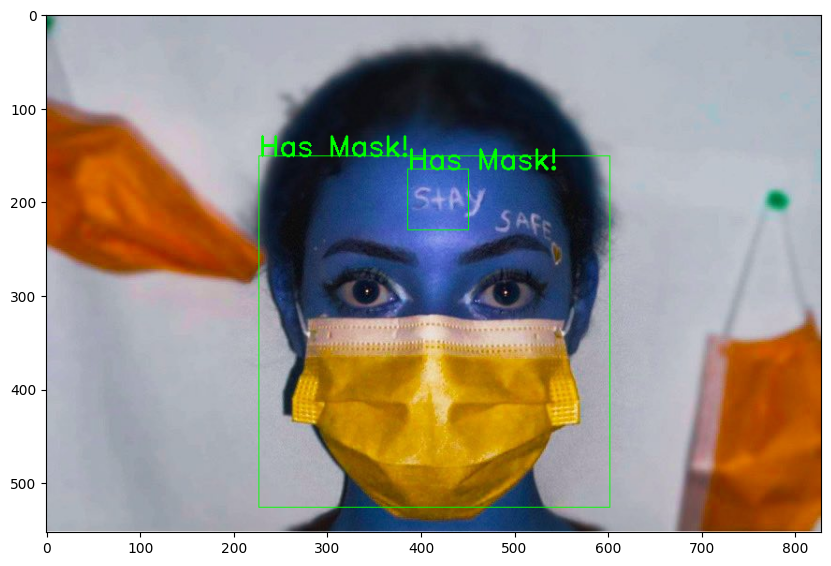

: 

In [42]:
path="./132445648_2875003336077300_8778835166104680218_n.jpg"
detectMask(path)

In [ ]:
if len(faces)>=1:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(150,150))
        crop = np.reshape(crop,[1,150,150,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[round(mask_result[0][0])],(x, y), cv2.FONT_HERSHEY_SIMPLEX,1,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No Face!")

No Face!


In [19]:
import cv2
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Load the pre-trained face detection model
face_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')  # Provide the correct path to the XML file.

# Load the mask detection model (assuming you have one)
# model = load_mask_detection_model()  # You need to implement this function.

# Define constants
MIN_DISTANCE = 50  # Adjust the minimum distance threshold based on your needs
mask_label = {0: "No Mask", 1: "Mask"}  # Define your mask labels
dist_label = {0: (0, 0, 255), 1: (0, 255, 0)}  # Define colors for labels

# Initialize webcam capture
cap = cv2.VideoCapture(0)  # Use 0 for the default camera. You can change it if you have multiple cameras.

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_model.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=2)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 1)

    if len(faces) >= 1:
        label = [0 for i in range(len(faces))]
        for i in range(len(faces) - 1):
            for j in range(i + 1, len(faces)):
                dist = distance.euclidean(faces[i][:2], faces[j][:2])
                if dist < MIN_DISTANCE:
                    label[i] = 1
                    label[j] = 1
        new_img = frame  # Colored output image

        for i in range(len(faces)):
            (x, y, w, h) = faces[i]
            crop = new_img[y:y + h, x:x + w]
            crop = cv2.resize(crop, (150, 150))
            crop = np.reshape(crop, [1, 150, 150, 3]) / 255.0
            mask_result = model.predict(crop)

            # Check the probability and set the label accordingly
            label_text = "Mask" if mask_result[0][0] < 0.5 else "No Mask"

            cv2.putText(new_img, label_text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, dist_label[label[i]], 2)
            cv2.rectangle(new_img, (x, y), (x + w, y + h), dist_label[label[i]], 1)
        cv2.imshow("Webcam", new_img)

    else:
        print("No Face!")

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


No Face!
No Face!
No Face!
No Face!
No Face!
No Face!
1/1 [==============================] - 0s 98ms/step
No Face!
1/1 [==============================] - 0s 74ms/step
No Face!
No Face!
No Face!
1/1 [==============================] - 0s 86ms/step
No Face!
1/1 [==============================] - 0s 78ms/step
No Face!
No Face!
No Face!
No Face!
No Face!
1/1 [==============================] - 0s 75ms/step
No Face!
No Face!
1/1 [==============================] - 0s 77ms/step
No Face!
1/1 [==============================] - 0s 73ms/step
No Face!
No Face!
1/1 [==============================] - 0s 76ms/step
No Face!
1/1 [==============================] - 0s 74ms/step
No Face!
1/1 [==============================] - 0s 82ms/step
No Face!
1/1 [==============================] - 0s 75ms/step
No Face!
1/1 [==============================] - 0s 79ms/step
No Face!
1/1 [==============================] - 0s 85ms/step
No Face!
1/1 [==============================] - 0s 80ms/step
No Face!
1/1 [===============

KeyboardInterrupt: 